In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [183]:
%matplotlib inline

## Getting all the sheets from provided datasets

In [184]:
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name=1,header=1)
NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name=2,header=1)
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name=3,header=1)
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name=4,header=1)

In [185]:
Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [186]:
NewCustomerList.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [187]:
CustomerDemographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [188]:
CustomerAddress.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## Merging Transaction and CustomerDemographic table based on customer id 

In [189]:
two_merge = pd.merge(Transactions,CustomerDemographic,on=['customer_id'])

## Merging Customer Address table with above merged table

In [190]:
final_table = pd.merge(two_merge,CustomerAddress,on=['customer_id'])

In [191]:
final_table.shape

(19968, 30)

In [192]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

So there are totals of 19968 enteries

### checking for missing values

In [193]:
final_table.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                                0
standard_cost                           195
product_first_sold_date                 195
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                         

### As we can see there are lots of Nan values in the given so we have to preprocess the Data 

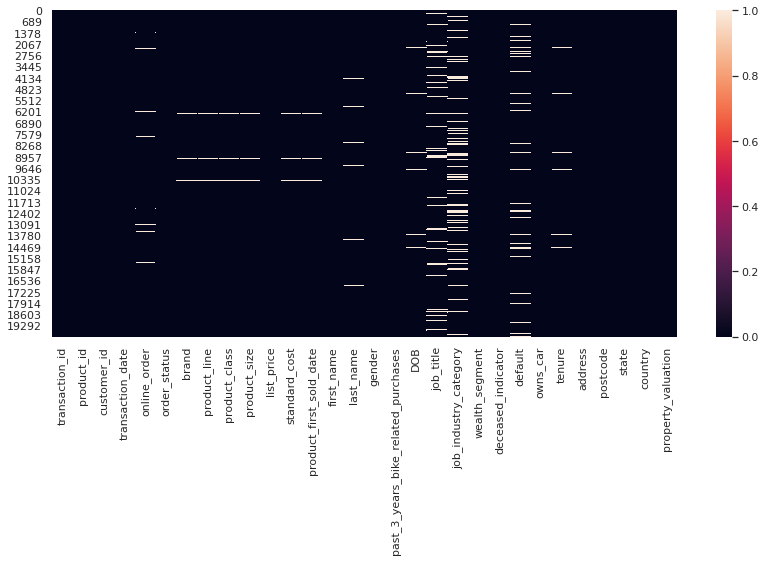

In [194]:
plt.figure(figsize=(14,6))
sns.heatmap(final_table.isnull())

we will remove columns having more than 50% of values None but there are no columns having more than 50% values None.
We will use mean,median,mode for filling values in the columns.

In [195]:
def impute_categorical_features(features):
    for feature in features:
        final_table[feature].fillna(final_table[feature].mode()[0],inplace=True)
        
def impute_numeric_features(features):
    for feature in features:
        final_table[feature].fillna(final_table[feature].mean(),inplace=True)
def drop_columns(features):
    for feature in features:
        final_table.drop(feature,axis=1,inplace=True)

In [196]:
missing_categorical = ['online_order','brand','product_line','product_class','product_size','job_title','job_industry_category']
missing_numeric = ['standard_cost','product_first_sold_date','tenure']

# Dropping irrelevant columns
drop_col = ['transaction_id','product_id','customer_id','first_name','last_name','default']

In [197]:
impute_categorical_features(missing_categorical)
impute_numeric_features(missing_numeric)
drop_columns(drop_col)

### As we can see from below that there is only missing values in Date_of_Birth column so we will drop the row having null values in their dob column missing values in datasets

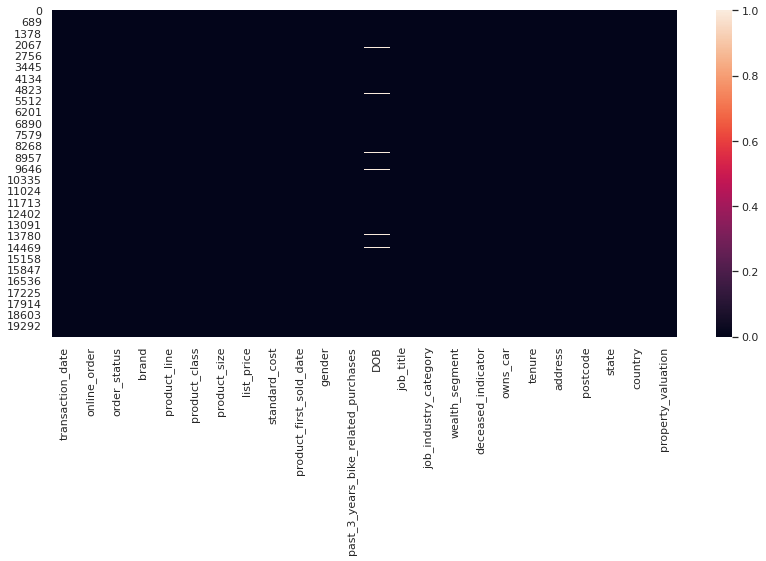

In [198]:
plt.figure(figsize=(14,6))
sns.heatmap(final_table.isnull())

In [199]:
final_table.dropna(axis=0,inplace=True)

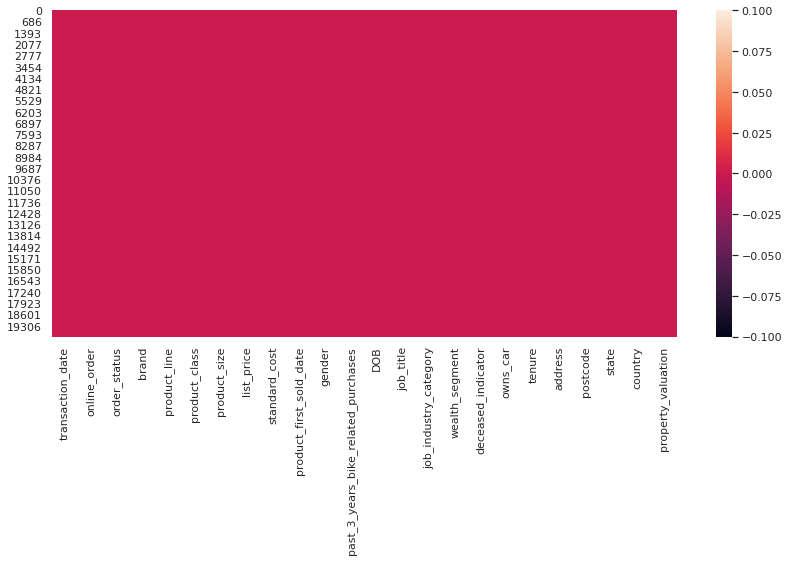

In [200]:
plt.figure(figsize=(14,6))
sns.heatmap(final_table.isnull())

### Making Age Column from Date_of_Birth_columns

In [201]:
now = pd.Timestamp('now')
final_table['DOB'] = pd.to_datetime(final_table['DOB'])
final_table['DOB'] = final_table['DOB'].where(final_table['DOB'] < now, final_table['DOB'] -  np.timedelta64(100, 'Y')) 
final_table['Age'] = (now - final_table['DOB']).astype('<m8[Y]')

### Remove the column of Dob when we have Age

In [202]:
final_table.drop(labels='DOB',axis=1,inplace=True)

## Dropping the duplicate rows

In [203]:
# Total number of rows and columns
final_table.shape

(19522, 24)

In [204]:
# Rows containing duplicate data
duplicate_rows_df = final_table[final_table.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 24)


In [205]:
#As you can see there are no duplicated rows in datasets so we don't need to remove duplicated rows
#So if the datasets have duplicated values you should follow the below instruction

In [206]:
# Used to count the number of rows before removing the data
final_table.count()

transaction_date                       19522
online_order                           19522
order_status                           19522
brand                                  19522
product_line                           19522
product_class                          19522
product_size                           19522
list_price                             19522
standard_cost                          19522
product_first_sold_date                19522
gender                                 19522
past_3_years_bike_related_purchases    19522
job_title                              19522
job_industry_category                  19522
wealth_segment                         19522
deceased_indicator                     19522
owns_car                               19522
tenure                                 19522
address                                19522
postcode                               19522
state                                  19522
country                                19522
property_v

In [207]:
# Dropping the duplicates 
final_table = final_table.drop_duplicates()

In [208]:
final_table.shape

(19522, 24)

In [209]:
final_table.dtypes

transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
gender                                         object
past_3_years_bike_related_purchases             int64
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
address                     

## checking for ouliers in the Data

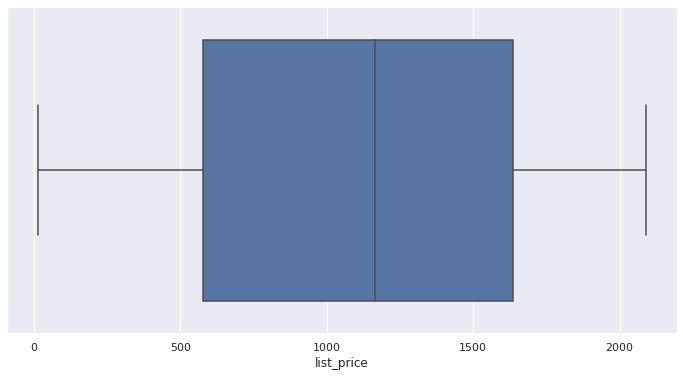

In [210]:
plt.figure(figsize=(12,6))
sns.boxplot(x=final_table['list_price'])

There is no ouliers in the list_price column

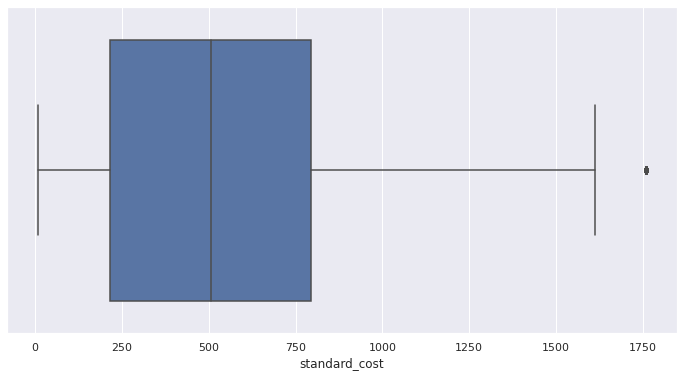

In [211]:
plt.figure(figsize=(12,6))
sns.boxplot(x=final_table['standard_cost'])

outliers detected in standard_cost columns so we simply droppped that rows which have value more than 1750

In [212]:
#Drop all the rows which have standard costs more than 1750 because it's behaviour is different in the data 
final_table = final_table[final_table['standard_cost'] <1750]

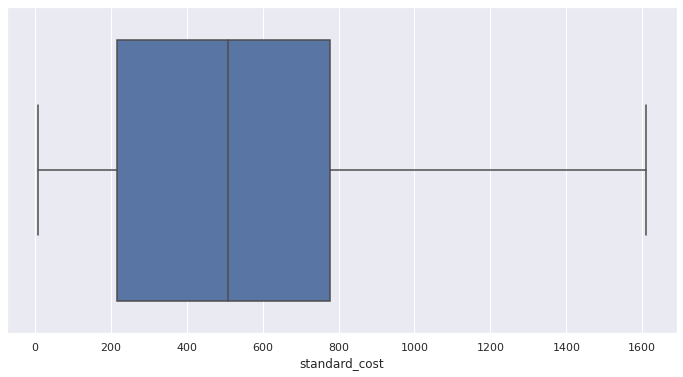

In [213]:
plt.figure(figsize=(12,6))
sns.boxplot(x=final_table['standard_cost'])

In [214]:
final_table['product_first_sold_date'].head(5)

0    41245.0
1    37659.0
2    40487.0
3    41701.0
4    40649.0
Name: product_first_sold_date, dtype: float64

In [215]:
#As we can see that product_first_sold_date isn't date column so we can remove this column

In [216]:
final_table.drop(labels='product_first_sold_date',axis=1,inplace=True)

In [217]:
#checking outliers in past_3_years_bike_related_purchases columns

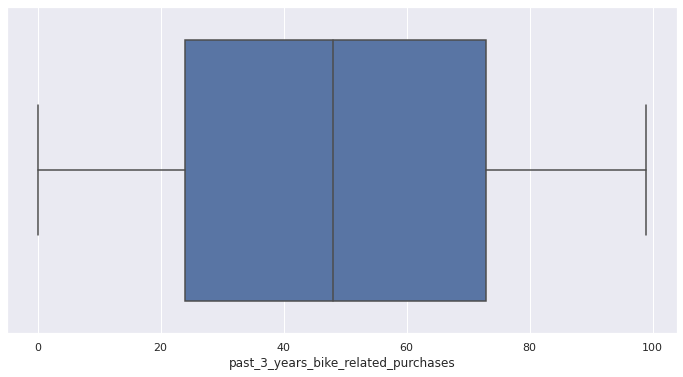

In [218]:
plt.figure(figsize=(12,6))
sns.boxplot(x=final_table['past_3_years_bike_related_purchases'])

outliers not detected in past_3_years_bike_related_purchases column

In [219]:
#checking outliers in tenure columns

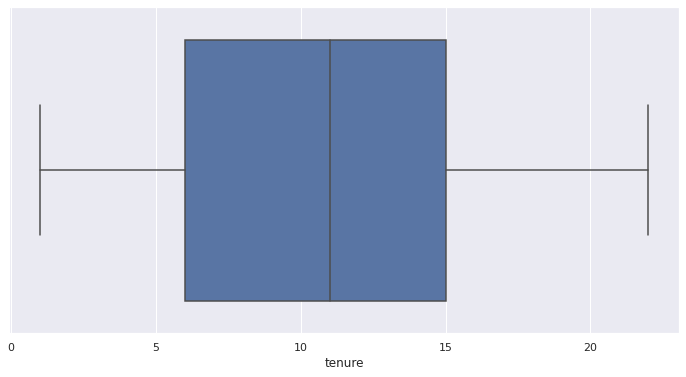

In [220]:
plt.figure(figsize=(12,6))
sns.boxplot(x=final_table['tenure'])

outliers not detected in tenure column

In [221]:
#checking outliers in property_valuation columns

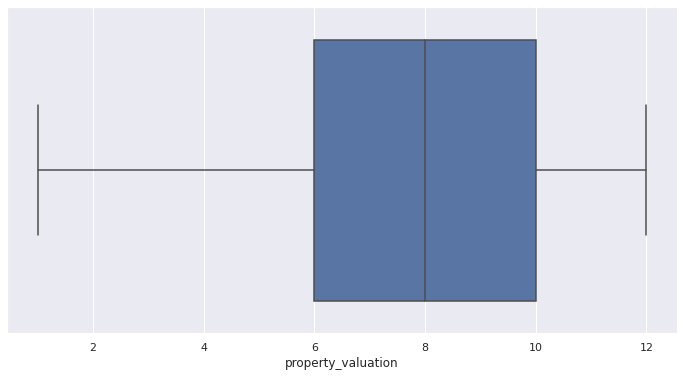

In [222]:
plt.figure(figsize=(12,6))
sns.boxplot(x=final_table['property_valuation'])

outliers not detected in property_valuation column

In [223]:
final_table.shape

(19333, 23)

In [224]:
final_table.to_csv('../output/final_table.csv',index=False)

## Till Now the datsets is accurate and complete

The table had shape (19968, 30) before and after we reduced it to (19773, 22)

# Exploratory Data Analysis